PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
#Import data and put it through pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Data Treatment (typing and shapes)

In [6]:
# Making columns have proper data types
# FIRST: Define target_column before using it
target_column = 'Transported'

# Remove rows with missing target values and completely empty rows
data = data.dropna(subset=[target_column])
data = data.dropna(how='all') 
print(f"After removing empty rows and missing target rows: {data.shape}")

# data type treatment
data['CryoSleep'] = data['CryoSleep'].astype('bool')
data['VIP'] = data['VIP'].astype('bool')
data['Transported'] = data['Transported'].astype('bool')
data['Cabin'] = data['Cabin'].astype('string')
data['HomePlanet'] = data['HomePlanet'].astype('string')
data['Destination'] = data['Destination'].astype('string')
data['Name'] = data['Name'].astype('string')
data['PassengerId'] = data['PassengerId'].astype('string')

After removing empty rows and missing target rows: (8693, 14)


In [7]:
# Meta Data Analysis
# This is essentially a classification problem, where we have to predict which passengers were transported to another dimension.
# The target variable is 'Transported', which is a boolean indicating whether the passenger was transported or not.
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nData types:")
print(data.dtypes)

print(data.head())

target_column = data.columns[-1]
feature_columns = data.columns[:-1]

X_train = data[feature_columns]
y_train = data[target_column]

print(f"\nFeatures shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"\nFeature columns: {feature_columns.tolist()}")
print(f"Target column: {target_column}")

Dataset shape: (8693, 14)
Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']

Data types:
PassengerId     string[python]
HomePlanet      string[python]
CryoSleep                 bool
Cabin           string[python]
Destination     string[python]
Age                    float64
VIP                       bool
RoomService            float64
FoodCourt              float64
ShoppingMall           float64
Spa                    float64
VRDeck                 float64
Name            string[python]
Transported               bool
dtype: object
  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIS

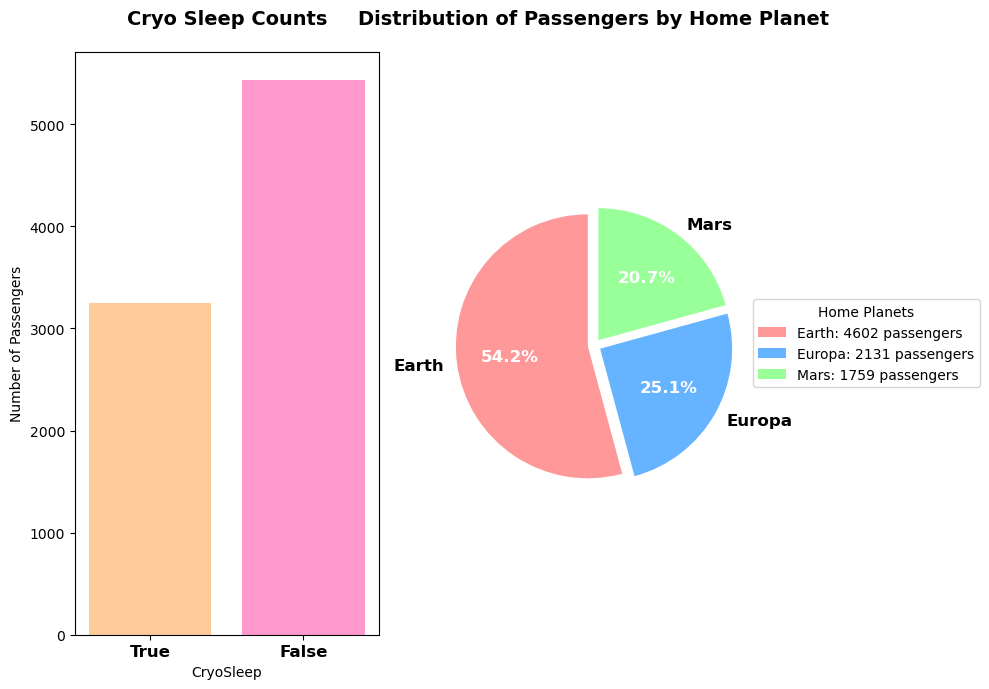

In [8]:
# Example data
homeplanet_counts = data['HomePlanet'].value_counts()
cryosleep_counts = data['CryoSleep'].value_counts()

# Create a figure with 1 row and 2 columns (side by side)
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# --- Pie Chart on the Left (Home Planet) ---
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
wedges, texts, autotexts = axs[1].pie(
    homeplanet_counts.values,
    labels=homeplanet_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie[:len(homeplanet_counts)],
    explode=[0.05] * len(homeplanet_counts)
)
axs[1].set_title('Distribution of Passengers by Home Planet', fontsize=14, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
legend_labels = [f'{planet}: {count} passengers' for planet, count in homeplanet_counts.items()]
axs[1].legend(wedges, legend_labels, title="Home Planets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].axis('equal')

# --- Bar Chart on the Right ---
colors_bar = ['#ffcc99', '#ff99cc']
x_labels = ["True", "False"]
counts = [cryosleep_counts.get(True, 0), cryosleep_counts.get(False, 0)]

axs[0].bar(x_labels, counts, color=colors_bar)  # pick colors as needed
axs[0].set_title('Cryo Sleep Counts', fontsize=14, fontweight='bold', pad=20)
axs[0].set_xlabel('CryoSleep')
axs[0].set_ylabel('Number of Passengers')
for tick in axs[0].get_xticklabels():
    tick.set_fontsize(12)
    tick.set_fontweight('bold')

# Adjust layout to fit everything
plt.tight_layout()
plt.show()

In [9]:
data['Destination'].unique()
data['Destination'].dropna()
data['Destination'].unique()

<StringArray>
['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', <NA>]
Length: 4, dtype: string

(np.float64(-1.14532775202758),
 np.float64(1.1518899935162281),
 np.float64(-1.1325769744737777),
 np.float64(1.151687426890532))

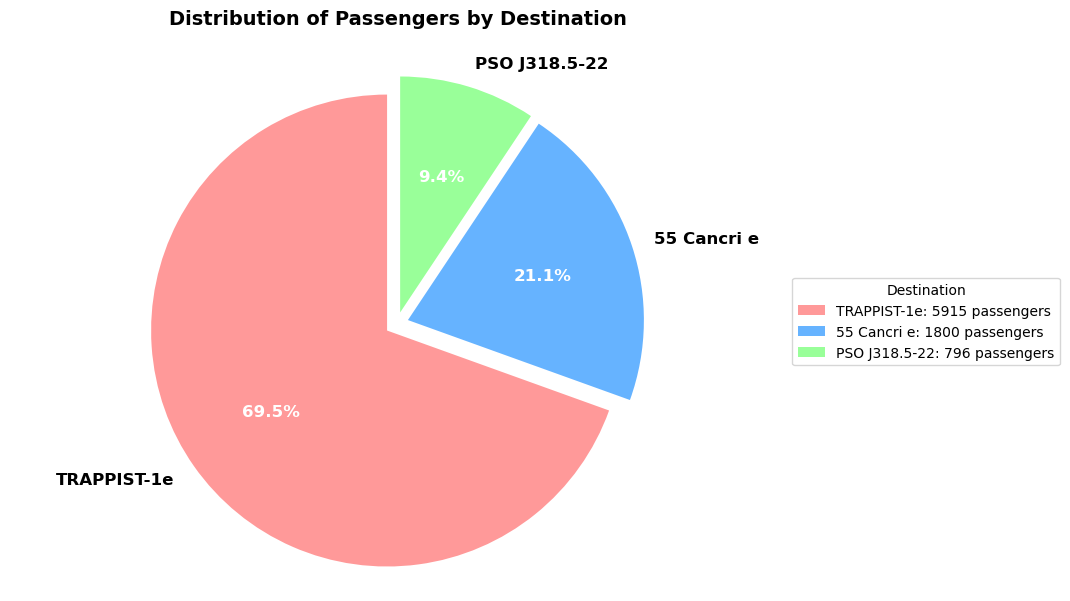

In [10]:
# Example data
destination_counts = data['Destination'].value_counts()
plt.figure(figsize=(10, 7))

colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = plt.pie(
    destination_counts.values,
    labels=destination_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie[:len(destination_counts)],
    explode=[0.05] * len(destination_counts)
)
plt.title('Distribution of Passengers by Destination', fontsize=14, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
legend_labels = [f'{dest}: {count} passengers' for dest, count in destination_counts.items()]
plt.legend(wedges, legend_labels, title="Destination", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')

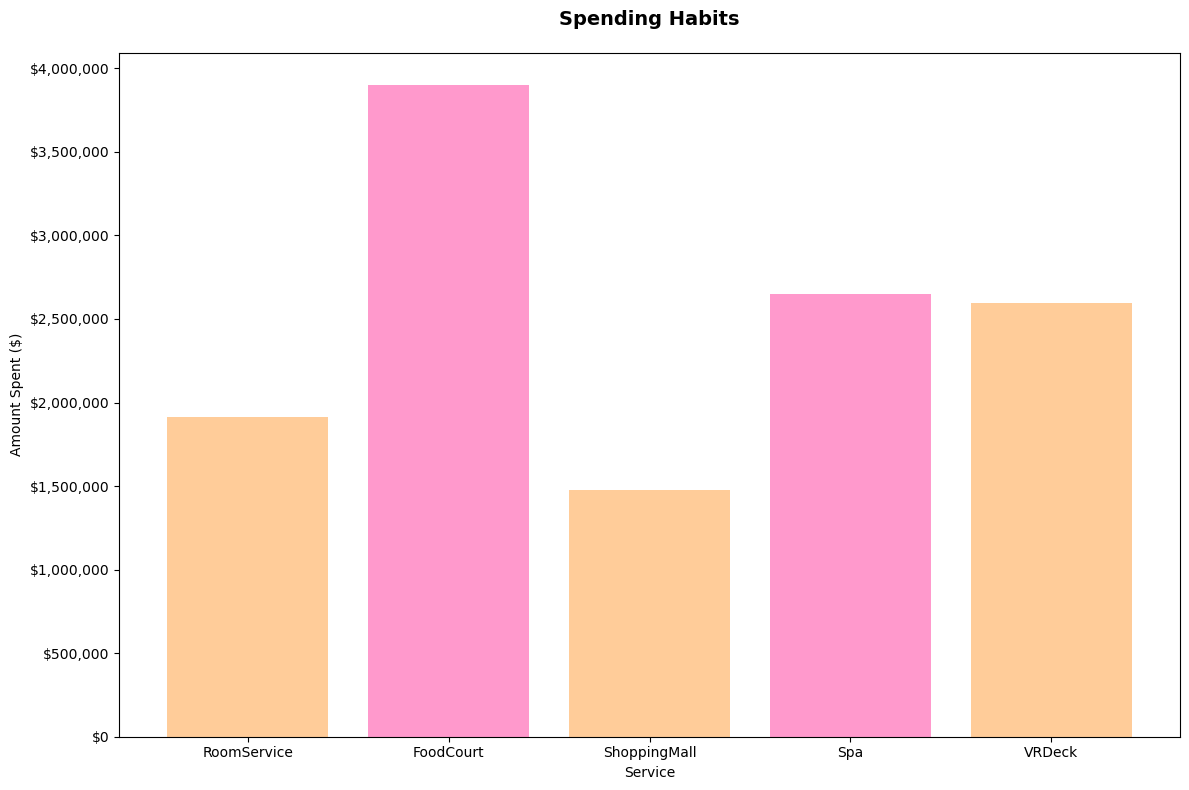

In [11]:
data_spending = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
x_labels = data_spending.columns.tolist()
counts = data_spending.sum()
plt.figure(figsize=(12, 8))
plt.bar(x_labels, counts, color=colors_bar)  # pick colors as needed
plt.title('Spending Habits', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Service')
plt.ylabel('Amount Spent ($)')

# Format y-axis to show proper dollar amounts instead of scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust layout to fit everything
plt.tight_layout()
plt.show()

In [12]:
# Count how many passengers were transported
transported_count = data['Transported'].value_counts()

# Or get all passengers who were transported
transported_passengers = data[data['Transported'] == True]
destination_transported_counts = transported_passengers['Destination'].value_counts()
print(destination_transported_counts)


Destination
TRAPPIST-1e      2787
55 Cancri e      1098
PSO J318.5-22     401
Name: count, dtype: Int64


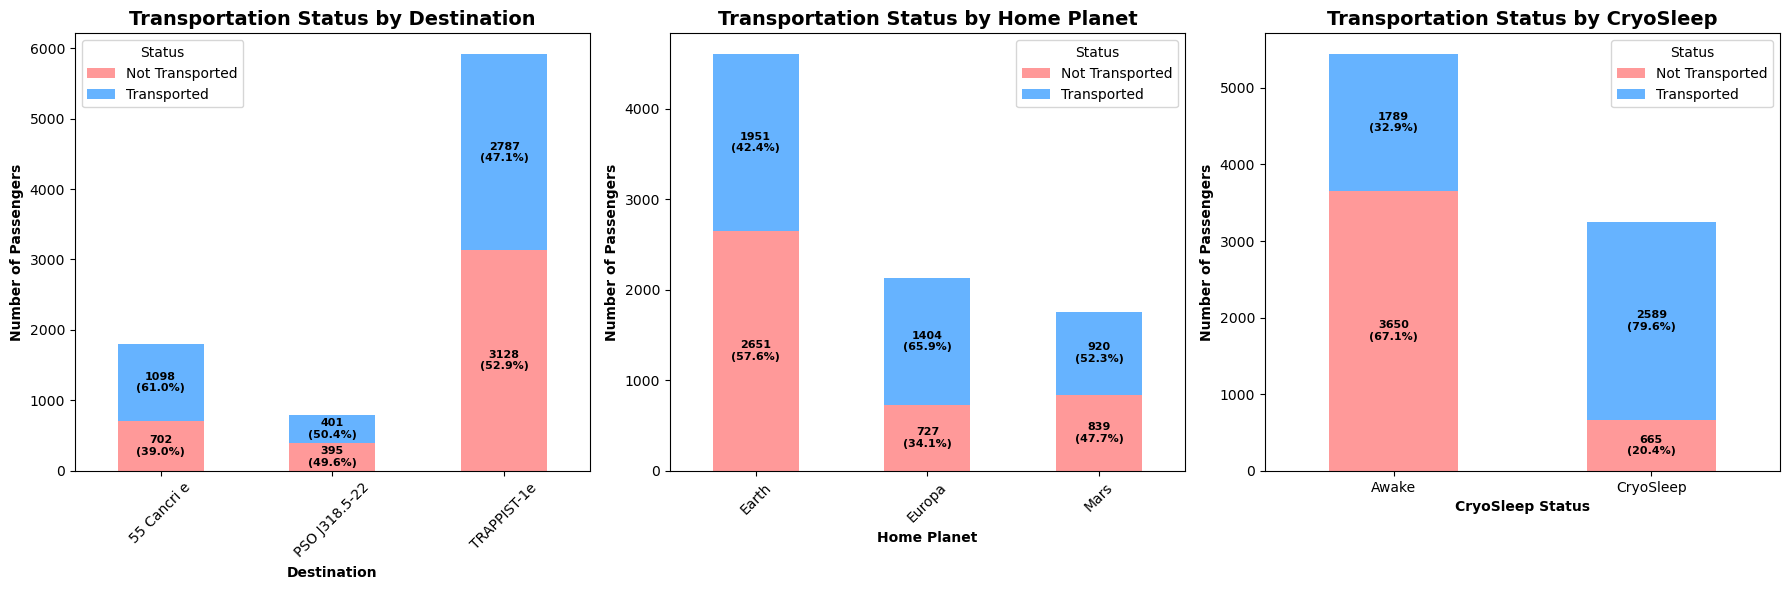

In [14]:
# Transportation Status Analysis by Key Features
# Create crosstabs for each feature
destination_transport_crosstab = pd.crosstab(data['Destination'], data['Transported'])
homeplanet_transport_crosstab = pd.crosstab(data['HomePlanet'], data['Transported'])
cryosleep_transport_crosstab = pd.crosstab(data['CryoSleep'], data['Transported'])

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors for consistency
colors = ['#ff9999', '#66b3ff']

# 1. Destination vs Transportation
destination_transport_crosstab.plot(kind='bar', 
                                   stacked=True, 
                                   ax=axes[0],
                                   color=colors)
axes[0].set_title('Transportation Status by Destination', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Destination', fontweight='bold')
axes[0].set_ylabel('Number of Passengers', fontweight='bold')
axes[0].legend(['Not Transported', 'Transported'], title='Status')
axes[0].tick_params(axis='x', rotation=45)

# Calculate percentages for destination
destination_rates = destination_transport_crosstab.div(destination_transport_crosstab.sum(axis=1), axis=0) * 100

# Add value labels with percentages
for i, container in enumerate(axes[0].containers):
    labels = []
    for j, (category, value) in enumerate(zip(destination_transport_crosstab.index, container.get_children())):
        count = int(value.get_height())
        percentage = destination_rates.iloc[j, i]
        if count > 0:
            labels.append(f'{count}\n({percentage:.1f}%)')
        else:
            labels.append('')
    axes[0].bar_label(container, labels=labels, label_type='center', fontweight='bold', fontsize=8)

# 2. Home Planet vs Transportation
homeplanet_transport_crosstab.plot(kind='bar', 
                                  stacked=True, 
                                  ax=axes[1],
                                  color=colors)
axes[1].set_title('Transportation Status by Home Planet', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Home Planet', fontweight='bold')
axes[1].set_ylabel('Number of Passengers', fontweight='bold')
axes[1].legend(['Not Transported', 'Transported'], title='Status')
axes[1].tick_params(axis='x', rotation=45)

# Calculate percentages for home planet
homeplanet_rates = homeplanet_transport_crosstab.div(homeplanet_transport_crosstab.sum(axis=1), axis=0) * 100

# Add value labels with percentages
for i, container in enumerate(axes[1].containers):
    labels = []
    for j, (category, value) in enumerate(zip(homeplanet_transport_crosstab.index, container.get_children())):
        count = int(value.get_height())
        percentage = homeplanet_rates.iloc[j, i]
        if count > 0:
            labels.append(f'{count}\n({percentage:.1f}%)')
        else:
            labels.append('')
    axes[1].bar_label(container, labels=labels, label_type='center', fontweight='bold', fontsize=8)

# 3. CryoSleep vs Transportation
cryosleep_transport_crosstab.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[2],
                                 color=colors)
axes[2].set_title('Transportation Status by CryoSleep', fontsize=14, fontweight='bold')
axes[2].set_xlabel('CryoSleep Status', fontweight='bold')
axes[2].set_ylabel('Number of Passengers', fontweight='bold')
axes[2].legend(['Not Transported', 'Transported'], title='Status')
axes[2].tick_params(axis='x', rotation=45)
# Rename x-axis labels for clarity
axes[2].set_xticklabels(['Awake', 'CryoSleep'], rotation=0)

# Calculate percentages for cryosleep
cryosleep_rates = cryosleep_transport_crosstab.div(cryosleep_transport_crosstab.sum(axis=1), axis=0) * 100

# Add value labels with percentages
for i, container in enumerate(axes[2].containers):
    labels = []
    for j, (category, value) in enumerate(zip(cryosleep_transport_crosstab.index, container.get_children())):
        count = int(value.get_height())
        percentage = cryosleep_rates.iloc[j, i]
        if count > 0:
            labels.append(f'{count}\n({percentage:.1f}%)')
        else:
            labels.append('')
    axes[2].bar_label(container, labels=labels, label_type='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

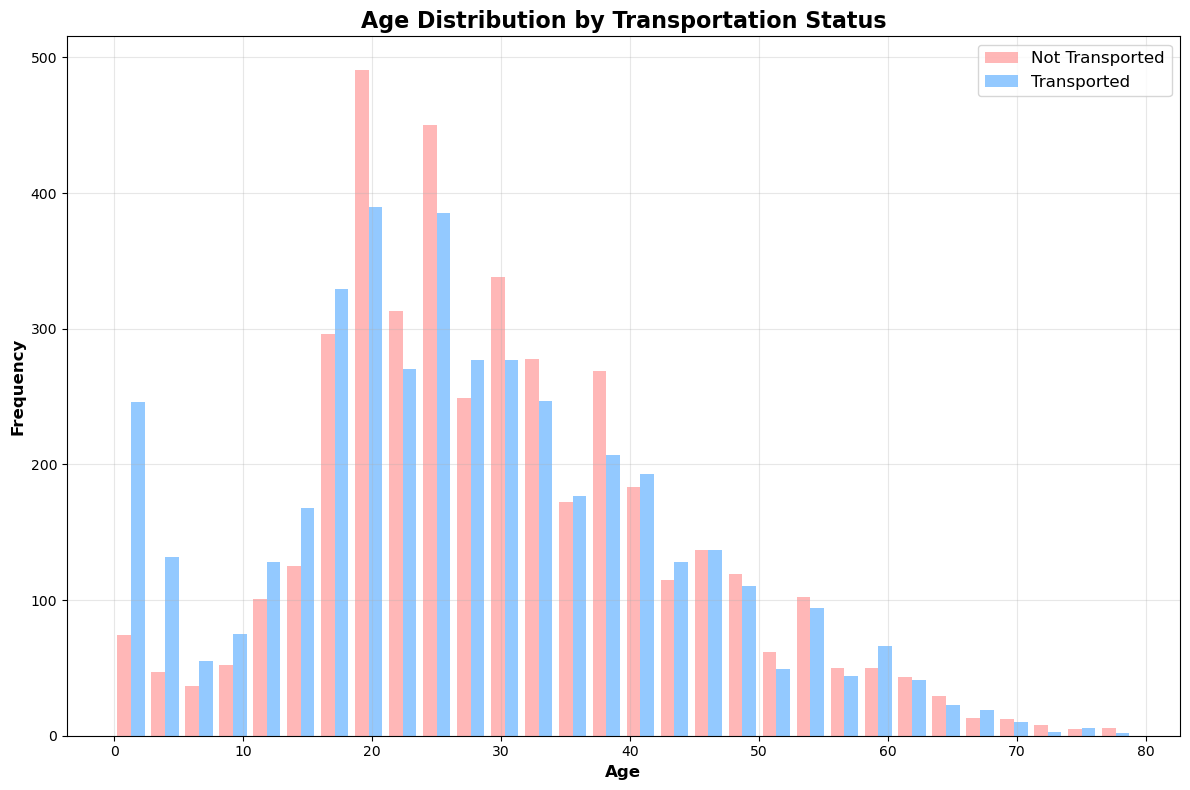

=== AGE ANALYSIS SUMMARY ===

Age statistics by transportation status:

Not Transported:
  Count: 4226
  Mean: 29.9 years
  Median: 27.0 years
  Std: 13.7 years

Transported:
  Count: 4288
  Mean: 27.7 years
  Median: 26.0 years
  Std: 15.2 years


In [ ]:
# Age Distribution Analysis by Transportation Status
import seaborn as sns

# Remove any missing age values for cleaner analysis
age_data = data.dropna(subset=['Age'])

# Side-by-Side Histograms
transported_ages = age_data[age_data['Transported'] == True]['Age']
not_transported_ages = age_data[age_data['Transported'] == False]['Age']

plt.figure(figsize=(12, 8))
plt.hist([not_transported_ages, transported_ages], 
         bins=30, alpha=0.7, 
         color=['#ff9999', '#66b3ff'], 
         label=['Not Transported', 'Transported'])
plt.title('Age Distribution by Transportation Status', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

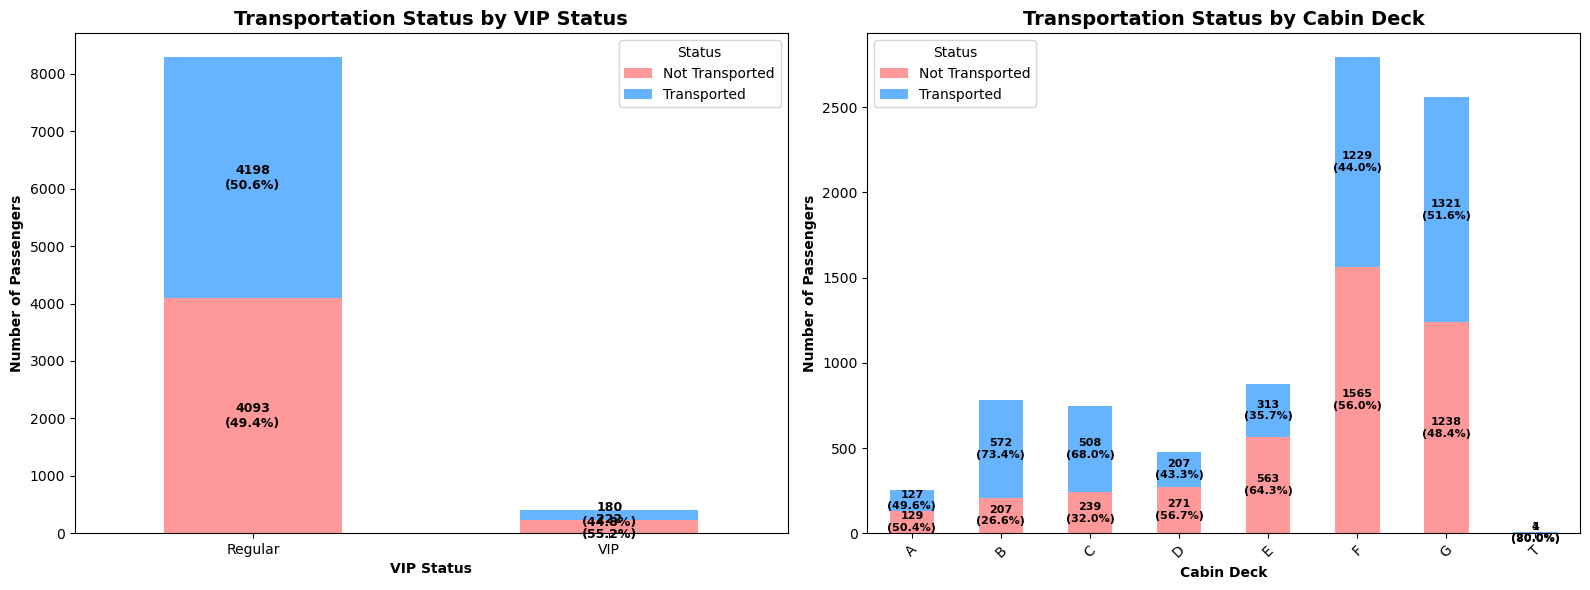

In [18]:
# VIP and Cabin Analysis by Transportation Status
# Create a figure with 1 row and 2 columns for VIP and Cabin analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colors for consistency
colors = ['#ff9999', '#66b3ff']

# 1. VIP Status vs Transportation (Left)
vip_transport_crosstab = pd.crosstab(data['VIP'], data['Transported'])

vip_transport_crosstab.plot(kind='bar', 
                           stacked=True, 
                           ax=axes[0],
                           color=colors)
axes[0].set_title('Transportation Status by VIP Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('VIP Status', fontweight='bold')
axes[0].set_ylabel('Number of Passengers', fontweight='bold')
axes[0].legend(['Not Transported', 'Transported'], title='Status')
axes[0].tick_params(axis='x', rotation=0)
# Rename x-axis labels for clarity
axes[0].set_xticklabels(['Regular', 'VIP'], rotation=0)

# Calculate percentages for VIP
vip_rates = vip_transport_crosstab.div(vip_transport_crosstab.sum(axis=1), axis=0) * 100

# Add value labels with percentages for VIP
for i, container in enumerate(axes[0].containers):
    labels = []
    for j, (category, value) in enumerate(zip(vip_transport_crosstab.index, container.get_children())):
        count = int(value.get_height())
        percentage = vip_rates.iloc[j, i]
        if count > 0:
            labels.append(f'{count}\n({percentage:.1f}%)')
        else:
            labels.append('')
    axes[0].bar_label(container, labels=labels, label_type='center', fontweight='bold', fontsize=9)

# 2. Cabin Deck vs Transportation (Right)
# Extract deck information from Cabin (first character before '/')
data_cabin = data.dropna(subset=['Cabin'])
data_cabin_copy = data_cabin.copy()
data_cabin_copy['Deck'] = data_cabin_copy['Cabin'].str.split('/').str[0]

deck_transport_crosstab = pd.crosstab(data_cabin_copy['Deck'], data_cabin_copy['Transported'])

deck_transport_crosstab.plot(kind='bar', 
                            stacked=True, 
                            ax=axes[1],
                            color=colors)
axes[1].set_title('Transportation Status by Cabin Deck', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cabin Deck', fontweight='bold')
axes[1].set_ylabel('Number of Passengers', fontweight='bold')
axes[1].legend(['Not Transported', 'Transported'], title='Status')
axes[1].tick_params(axis='x', rotation=45)

# Calculate percentages for Deck
deck_rates = deck_transport_crosstab.div(deck_transport_crosstab.sum(axis=1), axis=0) * 100

# Add value labels with percentages for Deck
for i, container in enumerate(axes[1].containers):
    labels = []
    for j, (category, value) in enumerate(zip(deck_transport_crosstab.index, container.get_children())):
        count = int(value.get_height())
        percentage = deck_rates.iloc[j, i]
        if count > 0:
            labels.append(f'{count}\n({percentage:.1f}%)')
        else:
            labels.append('')
    axes[1].bar_label(container, labels=labels, label_type='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()